In [1]:
import matplotlib.pyplot as plt
from pydicom import dcmread
import os
import numpy as np
import cv2
import skimage
from skimage import measure

In [2]:
def show_dicom_image(med_img, title=""):
    plt.figure(figsize=(15, 7))
    plt.imshow(med_img, cmap='gray')
    plt.title(title)
    plt.axis('off')

In [3]:
def transform_to_hu(medical_image, image):
    intercept = medical_image.RescaleIntercept
    slope = medical_image.RescaleSlope
    hu_image = image * slope + intercept

    return hu_image

In [4]:
def read_dicom_image(file_path):
    medical_image = dcmread(file_path)
    pixel_array = medical_image.pixel_array
    return medical_image, pixel_array

0 3042


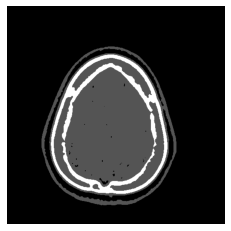

In [5]:
a, b = read_dicom_image("images/temp.dcm")
hu_image = transform_to_hu(a, b)
plt.imshow(b, cmap='gray')
print(b.min(), b.max())
plt.axis('off')
plt.savefig("temp.png")

0 2947


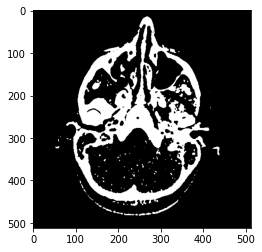

In [6]:
a, b = read_dicom_image("../Database/2EFVJVCN-Osso/I1680000")
hu_image = transform_to_hu(a, b)
plt.imshow(b, cmap='gray')
print(b.min(), b.max())

0 3042


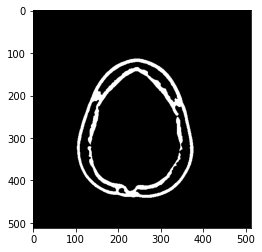

In [7]:
a, b = read_dicom_image("../Database/2EFVJVCN-Osso/I1000000")
hu_image = transform_to_hu(a, b)
plt.imshow(b, cmap='gray')
print(b.min(), b.max())

In [8]:
_, original_image = read_dicom_image("../Database/I1000000")

In [9]:
medical_image, pixel_array = read_dicom_image("images/temp.dcm")

In [10]:
hu_image = transform_to_hu(medical_image, pixel_array)

In [ ]:
abc = hu_image.copy()

max_value = abc.max()
min_value = abc.min()

print(abc.min(), abc.max())
abc = (abc == abc.max()) * max_value
abc[abc == 0] = min_value
plt.imshow(abc, cmap='gray')
print(abc.min(), abc.max())

In [ ]:
import cv2

image = cv2.imread("images/yang.png")
img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [ ]:
labels_mask = measure.label(pixel_array)                       
regions = measure.regionprops(labels_mask)
regions.sort(key=lambda x: x.area, reverse=True)
if len(regions) > 1:
    for rg in regions[1:]:
        labels_mask[rg.coords[:,0], rg.coords[:,1]] = 0

print(pixel_array.min(), pixel_array.max())
labels_mask[labels_mask!=0] = 1
mask = labels_mask

0 3042


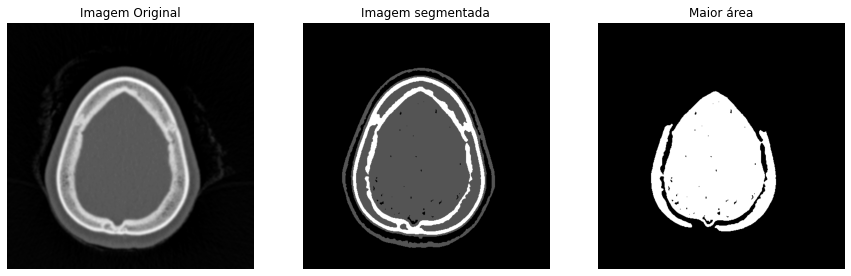

In [ ]:
plt.figure(figsize=(15, 7))
plt.subplot(1,3,1)
plt.imshow(original_image, cmap='gray')
plt.axis('off')
plt.title("Imagem Original")
plt.subplot(1,3,2)
plt.imshow(hu_image, cmap='gray')
plt.axis('off')
plt.title("Imagem segmentada")
plt.subplot(1,3,3)
plt.imshow(mask, cmap='gray')
plt.axis('off')
plt.title("Maior área")

plt.show()

In [ ]:
lim = [-15, 994, 2003]

abc = hu_image.copy()

In [ ]:
print(abc.min(), abc.max())

-1024.0 2018.0


In [ ]:
abc.shape

(512, 512)

In [ ]:
abc = (abc == abc.max()) * abc

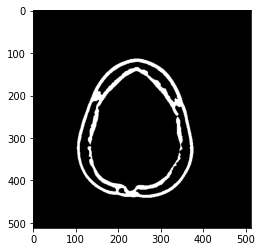

In [ ]:
plt.imshow(abc, cmap='gray')